In [1]:
import dataretrieval.nwis as nwis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

usgs_site = "13042500"
start_date = "1970-10-02"
end_date = "2020-09-30"

In [2]:
df_flow = nwis.get_record(sites= usgs_site, service= "dv", 
                        start= start_date, end= end_date)
df_flow

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1970-10-02 00:00:00+00:00,658.0,A,13042500
1970-10-03 00:00:00+00:00,658.0,A,13042500
1970-10-04 00:00:00+00:00,658.0,A,13042500
1970-10-05 00:00:00+00:00,653.0,A,13042500
1970-10-06 00:00:00+00:00,653.0,A,13042500
...,...,...,...
2020-09-26 00:00:00+00:00,331.0,A,13042500
2020-09-27 00:00:00+00:00,334.0,A,13042500
2020-09-28 00:00:00+00:00,334.0,A,13042500


In [6]:
q_ams = df_flow["00060_Mean"].groupby(df_flow.index.year).max().values

In [11]:
q_ams_sorted = np.sort(q_ams)

<AxesSubplot:xlabel='datetime'>

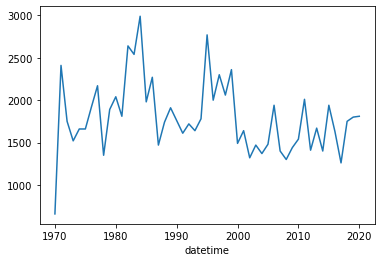

In [3]:
df_flow["00060_Mean"].groupby(df_flow.index.year).max().plot()

Text(0, 0.5, 'Annual Maximum FLow [ft$^3$/s]')

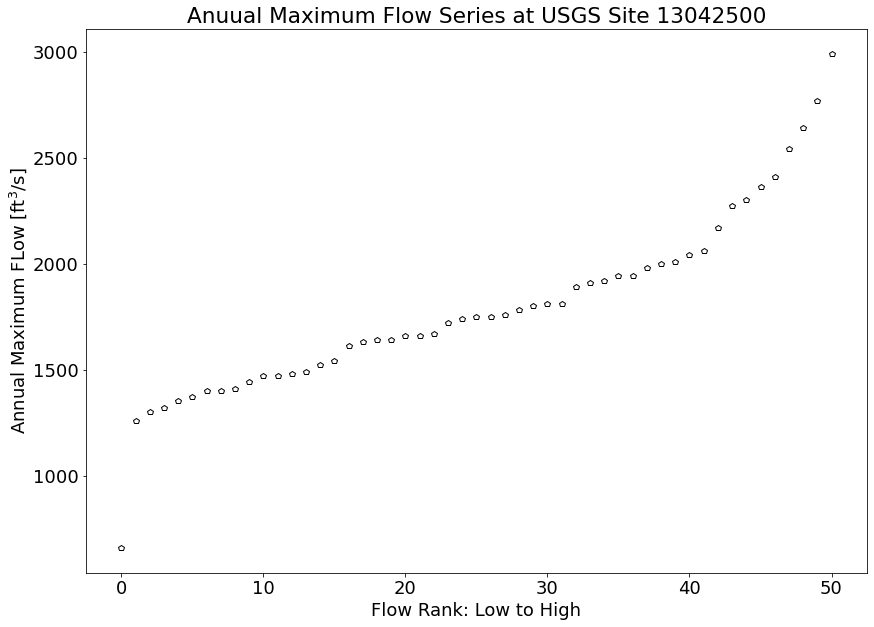

In [26]:
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18})
plt.plot(q_ams_sorted, linestyle = 'none', marker ="p", markerfacecolor = 'none', markeredgecolor = 'k')
plt.xlabel("Flow Rank: Low to High")
plt.title('Anuual Maximum Flow Series at USGS Site ' + usgs_site)
plt.ylabel("Annual Maximum FLow [ft$^3$/s]")